# One Outlier (Section 4.1)

This file contains an experiment identifying a single influential point that can cause a sign flip, which AMIP fails to detect.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import linear_regression
from linear_regression import LinearRegression
import algorithms

## Data Generation with intercept (i.e., an all-1's column).

In [4]:
np.random.seed(0)

# Generate Data
num_observations_pop_1 = 1
num_observations_pop_2 = 1000

# Generate the X values.
mean_pop_1 = np.array([1e6])
mean_pop_2 = np.array([0])
vars_pop_1 = np.array([[0]])
vars_pop_2 = [[1]]
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)

x = np.append(x1, x2, axis=0) 
x1_0 = [pt[0] for pt in x1]
x2_0 = [pt[0] for pt in x2]

# Add an intercept term.
df = pd.DataFrame(x)
df.insert(0, 'Ones', 1)
arr = df.values
x = arr
x1 = x[:1]
x2 = x[1:]

# Generating the Y values.
y1 = [1e6]

epsilon2 = np.random.normal(0, 1, num_observations_pop_2) # eps is the variance of the noise distribution.
slope = -1
intercept = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope*x2_0[i] + intercept + epsilon2[i]) # change here to add residual noise.

y = np.concatenate([y1, y2], axis=0)
# y

## Data Generation without intercept (i.e., an all-1's column).

In [2]:
np.random.seed(0)

# Generate Data
num_observations_pop_1 = 1
num_observations_pop_2 = 1000

# Generate the X values.
mean_pop_1 = np.array([1e2])
mean_pop_2 = np.array([0])
vars_pop_1 = np.array([[0]])
vars_pop_2 = [[1]]
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)

x = np.append(x1, x2, axis=0)
print(x)
x1 = x[:1]
x2 = x[1:]

# Add an intercept term.
# df = pd.DataFrame(x)
# df.insert(0, 'Ones', 1)
# arr = df.values
# x = arr

# Flatten x for ease of indexing.
x1_0 = x1.flatten()
x2_0 = x2.flatten()

# Generating the Y values.
y1 = [1e10]

epsilon2 = np.random.normal(0, 1, num_observations_pop_2) # eps is the variance of the noise distribution.
slope = -1
intercept = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope*x2_0[i] + intercept + epsilon2[i]) # change here to add residual noise.

y = np.concatenate([y1, y2], axis=0)
y

[[100.        ]
 [  0.40015721]
 [  0.97873798]
 ...
 [ -1.14761094]
 [ -0.35811408]
 [  0.55596268]]


array([ 1.00000000e+10,  4.92316679e-01, -1.40105281e+00, ...,
        5.70952564e-03, -9.52856295e-01, -2.08888373e+00])

## Model Fitting

Fit the data using OLS regression.

In [5]:
lr = LinearRegression(x=x.T, y=y)
lr.fit()
modified_lr_a = LinearRegression(x=x1.T, y=y1)
modified_lr_a.fit()
modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}\n" # with intercept (lr.beta[1]), without intercept (lr.beta[0])
    f"Estimated beta1 pop A: {modified_lr_a.beta[1]}\n"
    f"Estimated beta1 pop B: {modified_lr.beta[1]}"
)

Estimated beta1 with full dataset: 0.9999998935657151
Estimated beta1 pop A: 0.999999999999
Estimated beta1 pop B: -1.0329686114061063


In [6]:
lr = LinearRegression(x=x.T, y=y)
lr.fit()
modified_lr_a = LinearRegression(x=x1.T, y=y1)
modified_lr_a.fit()
modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta1 with full dataset: {lr.beta[0]}\n" # with intercept (lr.beta[1]), without intercept (lr.beta[0])
    f"Estimated beta1 pop A: {modified_lr_a.beta[0]}\n"
    f"Estimated beta1 pop B: {modified_lr.beta[0]}"
)

Estimated beta1 with full dataset: 0.10445962061901884
Estimated beta1 pop A: 9.999999999177334e-07
Estimated beta1 pop B: 0.009996176741509325


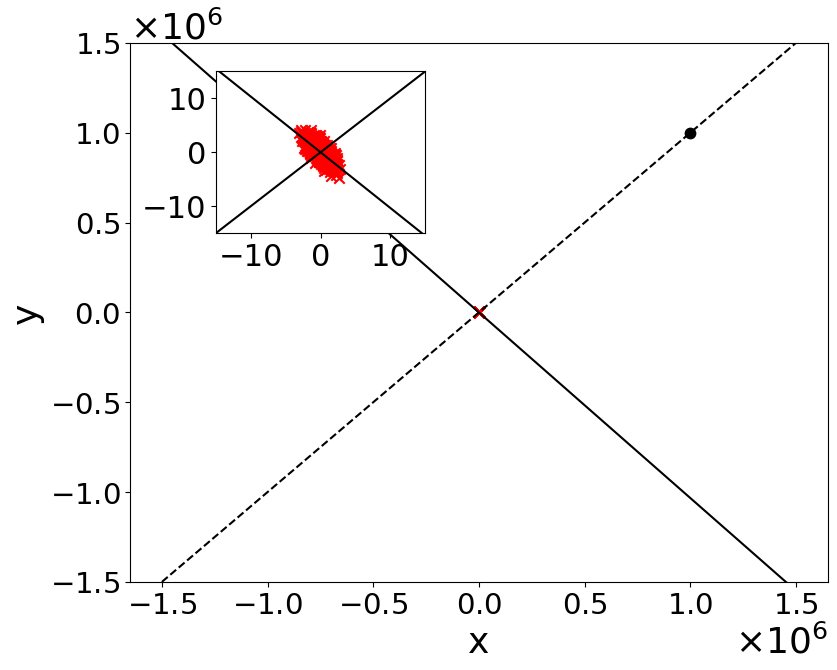

In [ ]:
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(9, 7))

x_values = np.linspace(-1.5e6, 1.5e6, 100)
y_values_full = lr.beta[1] * x_values
y_value_red_crosses = modified_lr.beta[1] * x_values

plt.plot(x_values, y_values_full, color='black', linestyle='--') 
plt.plot(x_values, y_value_red_crosses, color='black')
plt.scatter(x1_0, y1, marker='o', color='black', label='Pop. A', s=56)
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B', s=56)

plt.ylim(-1.5e6, 1.5e6)

plt.xlabel('x', fontsize=26) 
plt.ylabel('y', fontsize=26)

plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_offset_text().set_fontsize(26)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(26)

 # plt.legend(fontsize=22) # 16

# Create inset of the red crosses.
x_values_inset = np.linspace(-1.5e6, 1.5e6, 100)
y_values_full_inset = lr.beta[1] * x_values_inset
y_value_red_crosses_inset = modified_lr.beta[1] * x_values_inset

ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc='upper left', bbox_to_anchor=(0.113, -0.040, 1.0, 1), bbox_transform=plt.gca().transAxes)
ax_inset.plot(x_values_inset, y_values_full_inset, color='black') 
ax_inset.plot(x_values_inset, y_value_red_crosses_inset, color='black')
ax_inset.scatter(x1_0, y1, marker='o', color='black', s=56)
ax_inset.scatter(x2_0, y2, marker='x', color='r', s=56)
ax_inset.set_xlim(-1.5e1, 1.5e1)  
ax_inset.set_ylim(-1.5e1, 1.5e1)
ax_inset.tick_params(axis='both', which='major', labelsize=22) # 12
ax_inset.tick_params(axis='both', which='minor', labelsize=22)
# set ticks to scientific notation
ax_inset.yaxis.get_offset_text().set_fontsize(12)
ax_inset.xaxis.get_offset_text().set_fontsize(12)

# plt.savefig('one_outlier_example_10.pdf')
plt.show()

## Net Approx. Algorithm

In [5]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import scipy.linalg
import itertools

In [6]:
'''
For fixed lambda, compute maximum weight of any weight vector w
that has lambda in OLS(X,y,w)
'''
def solve_fixed_lambda(X,XR,lam):
    n = X.shape[0]
    d = X.shape[1]
    c = -np.ones((n))
    A_eq = np.zeros((d,n))
    b_eq = np.zeros((d))
    for i in range(d):
        A_eq[i] = (X.T)[i] * (XR@lam)
    m = gp.Model("net-model")
    m.Params.OutputFlag = 0
    w = m.addMVar(shape=n,vtype=GRB.CONTINUOUS,name="w",lb=0,ub=1)
    m.setObjective(c @ w, GRB.MINIMIZE)
    m.addConstr(A_eq @ w == b_eq)
    m.optimize()
    return w.X

'''
NET UPPER BOUND

Input:
- X: n x d (covariate matrix)
- y: n (response vector)
- trials: integer

Output:
- Net upper bound on Stability(X,y)
'''
def net_algorithm(X,y,trials):
    n = X.shape[0]
    d = X.shape[1]
    XR = np.zeros((d,n))
    for i in range(d-1):
        XR[i] = (X.T)[i+1]
    XR[d-1] = y
    XR = XR.T
    assert(np.linalg.matrix_rank(XR)==d)
    U,s,Vh = scipy.linalg.svd(XR, full_matrices=False)
    A = Vh.T @ np.diag(1.0/s) @ np.eye(d)
    wstar = np.zeros((n))
    for i in range(trials):
        v = np.random.multivariate_normal(np.zeros((d)),np.eye(d))
        v = v / np.linalg.norm(v)
        lam = A@v
        w = solve_fixed_lambda(X,XR,lam)
        if sum(w) > sum(wstar):
            wstar = w
    return n-sum(wstar), wstar

In [7]:
n_sumwstar, wstar = net_algorithm(x[:,1:],y,1000)

Set parameter Username
Set parameter LicenseID to value 2617160
Academic license - for non-commercial use only - expires 2026-02-01


In [8]:
print(f"Number of points needed to be removed to zero-out the OLS solution: {n_sumwstar}")
# find the indice of wstar that are non-one.
mis_inds = np.where(wstar != 1)[0]
mis_inds

Number of points needed to be removed to zero-out the OLS solution: 0.9999999989939852


array([0])

In [102]:
trials = 1000 # MR23: "trials should be chosen as large as possible subject to computational constraints."
n_sumwstar, wstar = net_algorithm(x,y,trials)

Set parameter Username
Set parameter LicenseID to value 2617160
Academic license - for non-commercial use only - expires 2026-02-01


In [103]:
print(f"Number of points needed to be removed to zero-out the OLS solution: {n_sumwstar}")
# find the indice of wstar that are non-one.
mis_inds = np.where(wstar != 1)[0]
mis_inds

Number of points needed to be removed to zero-out the OLS solution: 19.92006216696666


array([  0,  20, 271, 351, 382, 422, 427, 470, 485, 547, 589, 611, 671,
       685, 692, 735, 748, 751, 850, 856])

## Gurobi [FH23]

In [7]:
model_objbound_frac, model_objval_frac, weights_frac, model_frac = algorithms.solve_regression_fractional(x,y, intercept=True,time_limit=30, warm_start=None, verbose=True,
                               greater_one_constraint=False, pairs=None)
weights_from_fractional_gurobi = np.array([w.X for w in weights_frac])

Set parameter Username
Set parameter LicenseID to value 2617160
Academic license - for non-commercial use only - expires 2026-02-01
set residual constraints
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
start solving
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 21.0.1 21A344)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  30
NonConvex  2

Optimize a model with 2002 rows, 1003 columns and 2002 nonzeros
Model fingerprint: 0xc2c7d959
Model has 3 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-03, 1e+02]
  QLMatrix range   [8e-05, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 2002 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Found heuristic solution: objective -0.0000000
Presolve removed 20

In [8]:
model_objbound, model_objval, weights, model = algorithms.solve_regression_integral(x,y, intercept=True,time_limit=30, warm_start=weights_from_fractional_gurobi, verbose=True, #beta_sign=1,
                                warm_start_ub=None, pairs = None)
integer_weights = np.array([w.X for w in weights])

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 21.0.1 21A344)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  30
NonConvex  2

Optimize a model with 1 rows, 1004 columns and 1 nonzeros
Model fingerprint: 0x31b79d02
Model has 3 quadratic constraints
Variable types: 3 continuous, 1001 integer (1001 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-06, 1e+04]
  QLMatrix range   [8e-05, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]

User MIP start produced solution with objective 1000 (0.00s)
Loaded user MIP start with objective 1000

Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 6008 rows, 10013 columns, 23023 nonzeros
Presolved model has 6006 SOS constraint(s)
Variable types: 6009 

In [9]:
# select the indices of the points with weight 0.
indices_to_remove = np.where(integer_weights == 0)[0]
indices_to_remove

array([0])

## Gurobi (no warm start)

In [7]:
model_objbound, model_objval, weights, model = algorithms.solve_regression_integral(x,y, intercept=True,time_limit=30, warm_start=None, verbose=True, #beta_sign=1,
                            warm_start_ub=None, pairs = None)

Set parameter Username
Set parameter LicenseID to value 2617160
Academic license - for non-commercial use only - expires 2026-02-01
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 21.0.1 21A344)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
TimeLimit  30
NonConvex  2

Optimize a model with 1 rows, 1004 columns and 1 nonzeros
Model fingerprint: 0x8bb7c1d4
Model has 3 quadratic constraints
Variable types: 3 continuous, 1001 integer (1001 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [2e-06, 1e+04]
  QLMatrix range   [8e-05, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 6008 rows, 10013 columns, 23023

In [8]:
integer_weights = np.array([w.X for w in weights])

In [9]:
# select the indices of the points with weight 0.
indices_to_remove = np.where(integer_weights == 0)[0]
indices_to_remove

array([  0,   1,   3,  15,  18,  46,  52,  55,  68,  80,  87,  92, 156,
       175, 187, 200, 223, 267, 294, 317, 326, 337, 340, 362, 386, 397,
       428, 458, 519, 526, 527, 535, 544, 546, 577, 585, 597, 689, 693,
       723, 725, 780, 794, 816, 822, 824, 826, 839, 849, 850, 854, 866,
       873, 888, 897, 929, 931, 940, 944, 968, 972, 988, 994])

In [10]:
len(indices_to_remove)

63

## Checking each term in Prop C.2 (leverage and residual)

## Checking s and t.

In [ ]:
# dataset generation.
np.random.seed(0)

# Generate Data
num_observations_pop_1 = 1
num_observations_pop_2 = 1000

# Generate the X values.
# mean_pop_1 = np.array([1e10, 0, 0])
# mean_pop_2 = np.array([0, 0, 0])
# vars_pop_1 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
# vars_pop_2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
mean_pop_1 = np.array([1e10])
mean_pop_2 = np.array([0])
vars_pop_1 = np.array([[0]])
vars_pop_2 = np.array([[1]])

x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)

x = np.append(x1, x2, axis=0)
print(x)
x1 = x[:1]
x2 = x[1:]

# Flatten x for ease of indexing.
x1_0 = x1.flatten()
x2_0 = x2.flatten()

# Generating the Y values.
y1 = [1e10]

epsilon2 = np.random.normal(0, 1, num_observations_pop_2) # eps is the variance of the noise distribution.
slope = -1
intercept = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope*x2_0[i] + intercept + epsilon2[i]) # change here to add residual noise.

y = np.concatenate([y1, y2], axis=0)
y

[[ 1.00000000e+10]
 [ 4.00157208e-01]
 [ 9.78737984e-01]
 ...
 [-1.14761094e+00]
 [-3.58114075e-01]
 [ 5.55962680e-01]]


array([ 1.00000000e+10,  4.92316679e-01, -1.40105281e+00, ...,
        5.70952564e-03, -9.52856295e-01, -2.08888373e+00])

In [ ]:
Lambda = 1e2
xj = np.array([1]).reshape(-1, 1)
yj = np.array([4]).reshape(-1, 1)
v = np.array([1]).reshape(-1, 1)
e = np.array([1]).reshape(-1, 1)
xi = np.array([Lambda]).reshape(-1, 1)
yi = np.array([Lambda]).reshape(-1, 1)
Ainv = np.linalg.inv(x2.T @ x2)
Bi = np.dot(y2, x2).reshape(-1, 1)

s = v.T @ Ainv @ v * e.T @ Ainv @ xj - e.T @ Ainv @ v @ v.T @ Ainv @ xj
print(f'value of s: {s}')
t = yj * v.T @ Ainv @ v - v.T @ Ainv @ xj - Bi.T @ Ainv @ xj * v.T @ Ainv @ v + Bi.T @ Ainv @ v * v.T @ Ainv @ xj
print(f'value of t: {t}')

value of s: [[0.]]
value of t: [[0.00308173]]


### Checking each term in Prop D.2: Influence Function

In [196]:
Lambda = 1e6
xj = np.array([1, 2.697]).reshape(-1, 1)
yj = -4.854
xi = np.array([1, Lambda]).reshape(-1, 1)
v = np.array([1/Lambda, 1]).reshape(-1, 1)
e = np.array([0, 1]).reshape(-1, 1)
Ainv = np.linalg.inv(x2.T @ x2)
Bi = np.dot(y2, x2)

In [197]:
x.T @ x

array([[ 1001.        ,    53.53520284],
       [   53.53520284, 10973.47983971]])

In [198]:
x2.T @ x2 + x1.T @ x1

array([[ 1001.        ,    53.53520284],
       [   53.53520284, 10973.47983971]])

In [199]:
# empirically correct.
print(e.T @ np.linalg.inv(x.T @ x) @ xj)

# end of derivation.
print(Lambda * e.T @ Ainv @ xj / (1 + Lambda**2 * v.T @ Ainv @ v))

[[0.00024096]]
[[2.74346454e-06]]


### Checking the Rate of the Residual Term.

In [209]:
x2tx2inv = np.linalg.inv(x2.T @ x2)
v = np.array([[0, 1]])
v = v.T
v.shape

(2, 1)

In [210]:
et = np.array([[0, 1]])
et.shape

(1, 2)

In [211]:
xtxinv = np.linalg.inv(x.T @ x)
xtxinv.shape

(2, 2)

## Additive and Greedy algorithms.


In [106]:
def compute_scores(x, y, lr):
    '''
    x: design matrix.
    y: response vector.
    lr: linear regression model.
    '''
    # compute statistics.
    # intercept = [pt[0] for pt in x]
    xcoordinate = [pt[0] for pt in x]
    xcoordinate = np.array(xcoordinate)
    residuals = lr.residual()
    leverages = lr.leverage_scores()
    if_scores = -lr.influence_scores()[0]
    newton_scores = -lr.one_step_newton()[0]
    # xtxinvx = -lr.schmeverage_scores(np.array([[0], [1]])) # xtxinvx = -lr.schmeverage_scores(np.array([[1]])) 
    # xtxinvx = np.array(xtxinvx)

    # sort indices in ascending order of influence scores.
    # the most negative influence score corresponds to the most influential point.
    if_inds = np.argsort(if_scores)
    newton_inds = np.argsort(newton_scores)

    # sort statistics according to influence score order.
    sorted_x = xcoordinate[if_inds]
    sorted_y = y[if_inds]
    sorted_residuals = residuals[if_inds]
    sorted_leverages = leverages[if_inds]
    sorted_if_scores = if_scores[if_inds]
    sorted_newton_scores = newton_scores[if_inds] # sort the 1Exact scores according to if_inds 
    # to see the true effect of dropping a point, ranked in ascending order of influence scores.
    # sorted_xtxinvx = xtxinvx[if_inds]

    # create a df with residuals, leverages, and coordinates.
    orig_df = pd.DataFrame({'x': xcoordinate, 'y': y, 
                            'residual': residuals, 'leverage': leverages,
                            'IF': if_scores, '1Exact': newton_scores,
                            'sorted_IF_indices': if_inds, 'sorted_1Exact_indices': newton_inds, 
                            'sorted_x': sorted_x, 'sorted_y': sorted_y,
                            "sorted_residuals": sorted_residuals, "sorted_leverages": sorted_leverages, 
                            # 'sorted_xtxinvx': sorted_xtxinvx,
                            'sorted_IF_scores': sorted_if_scores, 'sorted_1Exact_scores': sorted_newton_scores,
                            })
    return orig_df

#### Additive Algorithms.

In [107]:
outlier_df = compute_scores(x, y, lr)
outlier_df.head(5)

,x,y,residual,leverage,IF,1Exact,sorted_IF_indices,sorted_1Exact_indices,sorted_x,sorted_y,sorted_residuals,sorted_leverages,sorted_IF_scores,sorted_1Exact_scores
0,100.000000,1.000000e+10,8.871205e+08,0.911288,-8.084222e+06,-9.112880e+07,0,0,100.000000,1.000000e+10,8.871205e+08,9.112880e-01,-8.084222e+06,-9.112880e+07
1,0.400157,4.923167e-01,-3.646584e+07,0.000015,1.329758e+03,1.329777e+03,629,629,-0.001385,1.416259e+00,1.262187e+05,1.748163e-10,1.593098e-02,1.593098e-02
2,0.978738,-1.401053e+00,-8.919121e+07,0.000087,7.955073e+03,7.955767e+03,361,361,0.003771,1.522187e+00,-3.436351e+05,1.295815e-09,1.180856e-01,1.180856e-01
3,2.240893,-2.136179e+00,-2.042099e+08,0.000458,4.170168e+04,4.172077e+04,437,437,0.005293,-1.203386e+00,-4.823137e+05,2.552709e-09,2.326259e-01,2.326259e-01
4,1.867558,-1.639505e+00,-1.701883e+08,0.000318,2.896406e+04,2.897327e+04,568,568,0.008628,8.419028e-01,-7.862492e+05,6.783686e-09,6.181885e-01,6.181885e-01


In [42]:
outlier_df.head(15)

,x,y,residual,leverage,IF,1Exact,sorted_IF_indices,sorted_1Exact_indices,sorted_x,sorted_y,sorted_residuals,sorted_leverages,sorted_IF_scores,sorted_1Exact_scores
0,1000000.000000,1000000.000000,0.001975,1.000,-1.974664e-09,-2.032970e+00,494,0,2.696224,-4.854293,-7.654976,0.001,-7.633959e-09,-7.641601e-09
1,0.400157,0.492317,-0.012300,0.001,-1.229461e-11,-1.230691e-11,198,494,2.163236,-4.175116,-6.442812,0.001,-6.428560e-09,-6.434995e-09
2,0.978738,-1.401053,-2.484250,0.001,-2.481701e-09,-2.484185e-09,689,198,2.380745,-3.786850,-6.272055,0.001,-6.256816e-09,-6.263079e-09
3,2.240893,-2.136179,-4.481532,0.001,-4.471270e-09,-4.475746e-09,943,689,2.759355,-3.116934,-5.980749,0.001,-5.963951e-09,-5.969921e-09
4,1.867558,-1.639505,-3.611522,0.001,-3.604602e-09,-3.608211e-09,418,943,1.519995,-4.322198,-5.946652,0.001,-5.937327e-09,-5.943270e-09
5,-0.977278,1.178758,2.051576,0.001,2.053487e-09,2.055543e-09,218,418,2.259309,-3.454296,-5.818064,0.001,-5.804635e-09,-5.810446e-09
6,0.950088,-0.409315,-1.463863,0.001,-1.462402e-09,-1.463866e-09,465,218,2.412454,-3.067999,-5.584912,0.001,-5.571165e-09,-5.576742e-09
7,-0.151357,-1.666720,-1.619823,0.001,-1.619993e-09,-1.621614e-09,113,465,1.910065,-3.405744,-5.420269,0.001,-5.409653e-09,-5.415068e-09
8,-0.103219,0.053895,0.052654,0.001,5.265699e-11,5.270970e-11,952,113,1.401345,-3.580276,-5.086081,0.001,-5.078709e-09,-5.083793e-09
9,0.410599,-0.171565,-0.686623,0.001,-6.863088e-10,-6.869958e-10,151,952,1.713343,-3.244146,-5.061948,0.001,-5.053031e-09,-5.058089e-09


if we consider the 1-outlier setting with no intercept, and (x,y) = (1e10, 1e10), then we find that for (x1, y1), the residual is zero while the leverage is 1e0, and for (x2, y2), the residual ranges from 1e-2 to 1 and the leverage ranges from 1e-21 to 1e-20. thus, the influence score for (x2, y2) is smaller.

In [8]:
# Influence score for black dot.
print('Influence score for black dot', (outlier_df['residual'][0] * outlier_df['leverage'][0]) / outlier_df['x'][0])
# Influence score for red cross with the largest influence score.
print('Influence score for red cross with the largest influence score', (outlier_df['sorted_residuals'][0] * outlier_df['sorted_leverages'][0]) / outlier_df['sorted_x'][0])

Influence score for black dot 1.9746642773417103e-09
Influence score for red cross with the largest influence score -0.002839131289055613


- at x = y = 1e3 AMIP fails in type 1 but not type 2 (correct ordering).
- at x = y = 1e6 AMIP fails in type 1 and type 2 (incorrect ordering).

In [9]:
print(f'The AMIP approximation of the refit is {round(lr.beta[1] + sum(outlier_df["sorted_IF_scores"][:1]), 4)}.')
print(f'The Add-1Exact for the change induced by dropping the worst-case subset of size at most 1 is {round(lr.beta[1] + sum(outlier_df["sorted_1Exact_scores"][:1]), 4)}.')
print(f'The true change induced by dropping the worst-case subset of size at most 1 is {round((modified_lr.beta[1]), 4)}.')

The AMIP approximation of the refit is 1.0.
The Add-1Exact for the change induced by dropping the worst-case subset of size at most 1 is 1.0.
The true change induced by dropping the worst-case subset of size at most 1 is -1.033.


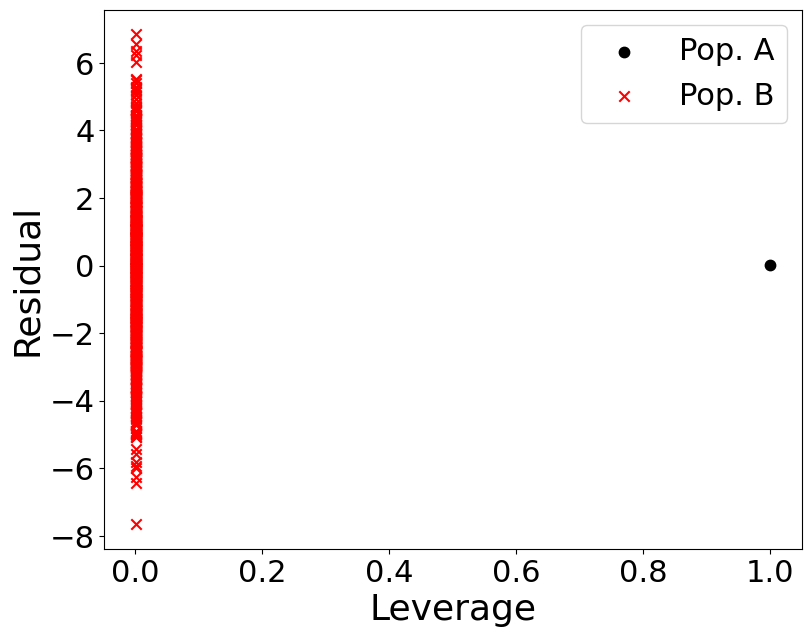

In [14]:
plt.figure(figsize=(9, 7))

plt.scatter(outlier_df['leverage'][:1], outlier_df['residual'][:1], marker='o', color='black', label='Pop. A', s=56)
plt.scatter(outlier_df['leverage'][1:], outlier_df['residual'][1:], marker='x', color='r', label='Pop. B', s=56)

plt.xlabel('Leverage', fontsize=26) 
plt.ylabel('Residual', fontsize=26)

plt.xticks(fontsize=22) 
plt.yticks(fontsize=22)

plt.legend(fontsize=22)
# plt.savefig('one_outlier_levresid.pdf', bbox_inches='tight')
plt.show()

#### Greedy Algorithms.

Greedy approximations for 1 data point is the same as the additive approximations.


## For Creating the Table and Leverage Plot in Appendix.

In [62]:
### Helpers.
def plot_regression(x, y, x1, y1, x2, y2):
    ## X vs Y
    plt.scatter(x1[0], y1, marker='o', color='black', label='Pop. A', s=56)
    plt.scatter(x2[0], y2, marker='x', color='r', label='Pop. B', s=56)
    # plt.title('One-dimensional Example')
    
    plt.xlabel('x', fontsize=22)  # Larger font for x-axis label
    plt.ylabel('y', fontsize=22)  # Larger font for y-axis label
    
    # Set the size of tick marks
    plt.xticks(fontsize=12)  # Larger ticks for x-axis
    plt.yticks(fontsize=12)  # Larger ticks for y-axis
    
    plt.legend(fontsize=22)

    plt.show()

    x = x.T
    lr = LinearRegression(x=x.T, y=y)
    lr.fit()
    print(
        f"Beta with full dataset: {lr.beta[0]}"
    )

    # Dropping just x1 should change the analysis (based on data generating process)
    modified_lr = LinearRegression(x=x2, y=y2) # Drop Pop_1 data
    modified_lr.fit()
    print(
        f"Beta with subset dropped: {modified_lr.beta[0]}"
    )
    
    return lr

def make_df(lr):
    # III. Compute influence scores and Newton scores for first coefficient.
    scores = -lr.influence_scores()[0] # after adding an intercept term, take the scores of coefficient 1.
    newton_scores = -lr.one_step_newton()[0]

    # sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
    inds = np.argsort(scores)
    # print("inds", inds[:10])
    original_inds = inds # original_inds

    newton_inds = np.argsort(newton_scores)
    # print("newton inds", newton_inds[:10])
    original_newton_inds = newton_inds 

    # sort scores.
    sorted_scores = scores[inds]
    # print("sorted_scores", sorted(scores)[:10])
    original_sorted_scores = sorted_scores

    sorted_newton_scores = newton_scores[inds]
    # print("sorted_newton_scores", sorted_newton_scores[:10])
    original_sorted_newton_scores = sorted_newton_scores
    
    # influential point
    outlier_x = np.squeeze(x1[0][0])
    outlier_y = np.squeeze(y1[0][0])
    print(f"outlier_x: {outlier_x}")
    print(f"outlier_y: {outlier_y}")
    # residuals
    residuals = lr.residual()
    # print(f"outlier_residual: {round(residuals[0], 4)}")
    # leverages
    leverages = lr.leverage_scores()
    # print(f"outlier_leverage: {round(leverages[0], 4)}")
    # schmeverage e1
    shmeverage_e1 = lr.schmeverage_scores([(1,)])
    # print(f'schmeverage_e1: {round(shmeverage_e1[0], 4)}')
    # Compute influence functions for first coefficient
    scores = -lr.influence_scores()[0] # effect of removing a data point on beta1.
    # print("outlier influence score:", round(scores[0], 4))
    leverage_correction = 1 / (1 - leverages)


    # create a df with residuals, leverages, and coordinates.
    orig_df = pd.DataFrame({'x': x.flatten(), 'y':y.flatten(),
                            'residual': residuals, 'schmeverage': shmeverage_e1,
                            'leverage': leverages, 'leverage_correction': leverage_correction,
                            'influence': scores, 'newton': newton_scores})
    
    return orig_df